In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
5019,0.563583,9.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6939,0.449333,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10453,1.000000,3.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.7, 0.2, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

"""use float32 data type for numerical values to reduce memory usage and improve performance"""

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-02-22 19:04:55.686423: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-22 19:04:55.686452: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-22 19:04:55.686462: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-22 19:04:55.686493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-22 19:04:55.686509: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([10288, 155]), TensorShape([1286, 155]), (1286, 155))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
78,0.601750,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1125,1.000000,3.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
963,0.368714,10.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
# Training set
train_pred = model.predict(x_train)
train_error = mean_absolute_error(y_train, train_pred)

# Testing set
test_pred = model.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')

Training Error: 0.04320740355615277
Testing Error: 0.050213163839809595


In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

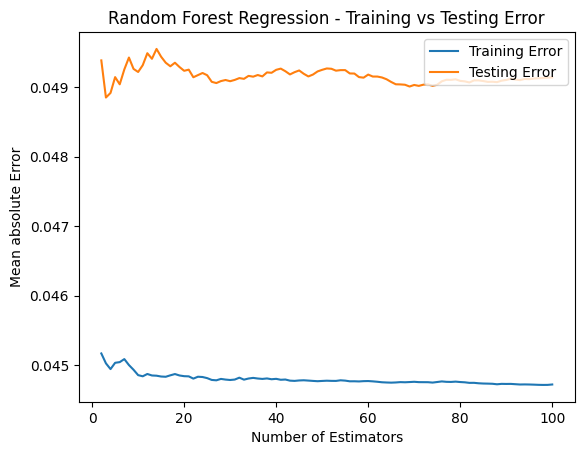

In [12]:
train_errors = []
test_errors = []

for i in range(2, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(2, 101), train_errors, label='Training Error')
plt.plot(range(2, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [13]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Reshape((1, 64))) 
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 14

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/14


2024-02-22 19:07:38.957650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 6s 14ms/step - loss: 0.2519 - mae: 0.2519 - val_loss: 0.1717 - val_mae: 0.1717
Epoch 2/14
322/322 [==============================] - 4s 13ms/step - loss: 0.1219 - mae: 0.1219 - val_loss: 0.0918 - val_mae: 0.0918
Epoch 3/14
322/322 [==============================] - 4s 12ms/step - loss: 0.0743 - mae: 0.0743 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 4/14
322/322 [==============================] - 4s 13ms/step - loss: 0.0639 - mae: 0.0639 - val_loss: 0.0620 - val_mae: 0.0620
Epoch 5/14
322/322 [==============================] - 4s 14ms/step - loss: 0.0601 - mae: 0.0601 - val_loss: 0.0582 - val_mae: 0.0582
Epoch 6/14
322/322 [==============================] - 4s 12ms/step - loss: 0.0577 - mae: 0.0577 - val_loss: 0.0570 - val_mae: 0.0570
Epoch 7/14
322/322 [==============================] - 4s 12ms/step - loss: 0.0570 - mae: 0.0570 - val_loss: 0.0563 - val_mae: 0.0563
Epoch 8/14
322/322 [==============================] - 4s 12ms/step - loss: 0.054

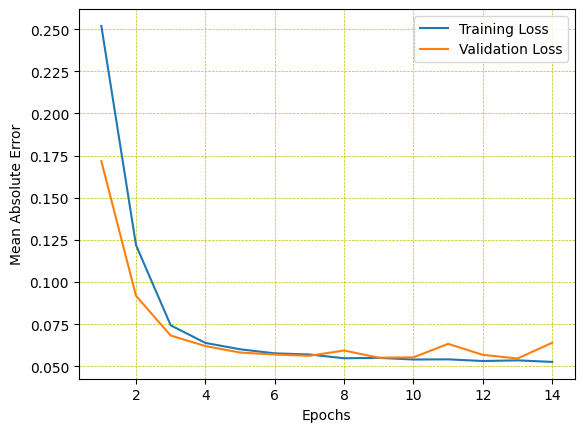

In [14]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training Loss')
plt.plot(x_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [15]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
final_model.add(tf.keras.layers.LSTM(128))
final_model.add(tf.keras.layers.Dense(64, activation='tanh'))
final_model.add(tf.keras.layers.Reshape((1, 64))) 
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(4, activation='tanh'))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 6

# train model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/6
322/322 [==============================] - 6s 15ms/step - loss: 0.2750 - mae: 0.2750 - val_loss: 0.1858 - val_mae: 0.1858
Epoch 2/6
322/322 [==============================] - 4s 13ms/step - loss: 0.1399 - mae: 0.1399 - val_loss: 0.0957 - val_mae: 0.0957
Epoch 3/6
322/322 [==============================] - 4s 13ms/step - loss: 0.0777 - mae: 0.0777 - val_loss: 0.0677 - val_mae: 0.0677
Epoch 4/6
322/322 [==============================] - 4s 12ms/step - loss: 0.0650 - mae: 0.0650 - val_loss: 0.0628 - val_mae: 0.0628
Epoch 5/6
322/322 [==============================] - 4s 12ms/step - loss: 0.0598 - mae: 0.0598 - val_loss: 0.0641 - val_mae: 0.0641
Epoch 6/6
322/322 [==============================] - 4s 12ms/step - loss: 0.0580 - mae: 0.0580 - val_loss: 0.0582 - val_mae: 0.0582


In [16]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 155)               24180     
                                                                 
 reshape_2 (Reshape)         (None, 1, 155)            0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               145408    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 reshape_3 (Reshape)         (None, 1, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 16)                5184      
                                                                 
 dense_6 (Dense)             (None, 4)                

In [17]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

41/41 [==============================] - 0s 5ms/step - loss: 0.0544 - mae: 0.0544


[0.054428841918706894, 0.054428841918706894]

In [18]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

41/41 [==============================] - 1s 8ms/step


array([[1.0056639 ],
       [0.4431202 ],
       [1.0011756 ],
       [0.517801  ],
       [0.21374512]], dtype=float32)

In [19]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1.    , 0.4258, 1.    , 0.666 , 0.003 ], dtype=float32)>

In [22]:
from sklearn.metrics import root_mean_squared_error

In [23]:
root_mean_squared_error(y_test_tensor, y_predictions)

0.10167058

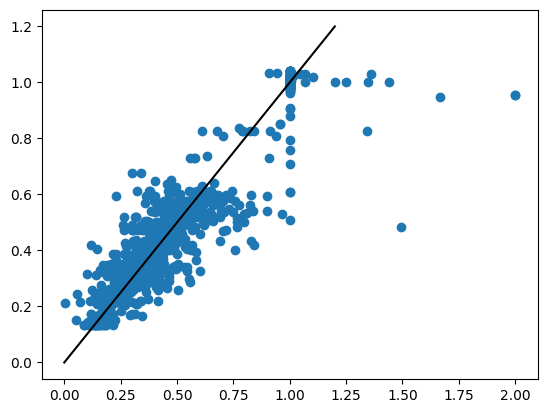

In [24]:
x = [0 , 1.2]
y = x

plt.scatter(y_test_tensor, y_predictions)
plt.plot(x, y, color='black')

In [26]:
# save final model
final_model.save('sales_prediction_model')

INFO:tensorflow:Assets written to: sales_prediction_model/assets


INFO:tensorflow:Assets written to: sales_prediction_model/assets
